
# Figure 2 and S3

22-02-21

Katie Willis

katie.willis16@imperial.ac.uk

In [1]:
] activate "./Environment/" 

 Activating environment at `~/Documents/OneDrive - Imperial College London/PhD work/Drive_modelling/Projects/PrivateDrive/DoubleDriveSimulator/Environment/Project.toml`


In [2]:
using NBInclude
@nbinclude("./Environment/Setup.ipynb");
using Plots; pyplot()

Plots.PyPlotBackend()

In [5]:
#Load baseline model
@nbinclude("DoubleDrive_Simulator_Baseline.ipynb");

In [6]:
#Assign plotting parameters
PyPlot.rc("font", family="Arial")
PyPlot.rc("xtick", labelsize=10) 
PyPlot.rc("ytick", labelsize=10) 

blue = "#0155FF"
light_blue = "#78A0FF"
red = "#FF011A"
light_red = "#FF7689"
col1 = "#BA03FF" #purple
col2 = "#FF8509" #orange
col3 = "#FF6CE8" #pink
col4 = "#FFBF09" #yellow
col5 = "#00DF97" #green

"#00DF97"

### Simulations

#### Design 1

In [7]:
#Define design
LOCUS_A = "neutral"
LOCUS_B = "HS_rec"
set_A_homing_dependency = "constitutive"
set_B_homing_dependency = "conditional"
set_XS_dependency = "none"

#Assign starting parameters.
params,
A_homing_dependency,
B_homing_dependency,
XS_dependency = Assign_baseline_params(LOCUS_A,
            LOCUS_B,
            set_A_homing_dependency,
            set_B_homing_dependency,
            set_XS_dependency);

A_construct = [] #We assume no expression costs so do not need to define construct content
B_construct = []
fitness_effect = "adult"
transgenic_genotype = "ABab"
release_freq = 0.001
resistant_allele = "α"

#simulate target population
resistant_freq = 0.01
t = 100
output_1 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);

#simulate off-target population
resistant_freq = 1.0
t = 200
off_target_output_1 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);

In [8]:
#Minimum number of female adults
minf = minimum(output_1["relative_number_females"].adult)

3.580115957757028e-6

In [9]:
#No. generations until the minimum number of females is reached
findall(x->x==minf,output_1["relative_number_females"].adult)

1-element Array{Int64,1}:
 25

In [10]:
#Max percentage reduction in number of females for the off-target population
(1-minimum(off_target_output_1["relative_number_females"].adult))*100

0.009886460094399308

In [11]:
#number of generations with more that 95% reduction in female density
sum(output_1["relative_number_females"].adult .< 0.05)

17

#### Design 2

In [12]:
#Define design
LOCUS_A = "neutral"
LOCUS_B = "HS_rec"
set_A_homing_dependency = "conditional"
set_B_homing_dependency = "conditional"
set_XS_dependency = "none"

##Assign starting parameters.
params,
A_homing_dependency,
B_homing_dependency,
XS_dependency = Assign_baseline_params(LOCUS_A,
            LOCUS_B,
            set_A_homing_dependency,
            set_B_homing_dependency,
            set_XS_dependency);

A_construct = []
B_construct = []
fitness_effect = "adult"
transgenic_genotype = "ABab"
release_freq = 0.001
resistant_allele = "α"

#Simulate target population
resistant_freq = 0.01
t = 100
output_2 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);

#Simulate off-target population
resistant_freq = 1.0
t = 200
off_target_output_2 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);

In [13]:
#Minimum number of female adults
minimum(output_2["relative_number_females"].adult)

0.00014698744050499309

In [14]:
#Max percentage reduction in number of females for the off-target population
(1-minimum(off_target_output_2["relative_number_females"].adult))*100

0.010049640705045437

In [15]:
#number of generations with more that 95% reduction in female density
sum(output_2["relative_number_females"].adult .< 0.05)

13

#### Design 3

In [16]:
#Define design
LOCUS_A = "neutral"
LOCUS_B = "HS_rec"
set_A_homing_dependency = "constitutive"
set_B_homing_dependency = "conditional"
set_XS_dependency = "constitutive_B"

#Assign starting parameters.
params,
A_homing_dependency,
B_homing_dependency,
XS_dependency = Assign_baseline_params(LOCUS_A,
            LOCUS_B,
            set_A_homing_dependency,
            set_B_homing_dependency,
            set_XS_dependency);

A_construct = []
B_construct = []
fitness_effect = "adult"
transgenic_genotype = "ABab"
release_freq = 0.001
resistant_allele = "α"

#Simulate target population
resistant_freq = 0.2
t = 100
output_3 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);

#Simulate off-target population
resistant_freq = 1.0
t = 200
off_target_output_3 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);


In [17]:
#Minimum number of female adults
minimum(output_3["relative_number_females"].adult)

2.9881034393557887e-6

In [18]:
#Max % reduction in number of females for the off-target population
(1-minimum(off_target_output_3["relative_number_females"].adult))*100

2.245552529178285

#### Design 4

In [19]:
#Define design
LOCUS_A = "neutral"
LOCUS_B = "HS_rec"
set_A_homing_dependency = "conditional"
set_B_homing_dependency = "conditional"
set_XS_dependency = "constitutive_B"

#Assign starting parameters.
params,
A_homing_dependency,
B_homing_dependency,
XS_dependency = Assign_baseline_params(LOCUS_A,
            LOCUS_B,
            set_A_homing_dependency,
            set_B_homing_dependency,
            set_XS_dependency);

A_construct = []
B_construct = []
fitness_effect = "adult"

#SIMULATE
transgenic_genotype = "ABab"
release_freq = 0.001
resistant_allele = "α"

#Simulate target population
resistant_freq = 0.2
t = 100
output_4 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);

#Simulate off-target population
resistant_freq = 1.0
t = 200
off_target_output_4 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);



In [20]:
#Minimum number of female adults
minimum(output_4["relative_number_females"].adult)

0.0009875156750424282

#### Design 5

In [21]:
#Define design
LOCUS_A = "neutral"
LOCUS_B = "HI"
set_A_homing_dependency = "conditional"
set_B_homing_dependency = "constitutive"
set_XS_dependency = "constitutive_A"

#Assign starting parameters.
params,
A_homing_dependency,
B_homing_dependency,
XS_dependency = Assign_baseline_params(LOCUS_A,
            LOCUS_B,
            set_A_homing_dependency,
            set_B_homing_dependency,
            set_XS_dependency);

A_construct = []
B_construct = []
fitness_effect = "adult"
transgenic_genotype = "ABab"
release_freq = 0.001
resistant_allele = "α"

#simulate target population
resistant_freq = 0.5
t = 200
output_5 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);

#simjulate off-target population
resistant_freq = 1.0
t = 200
off_target_output_5 = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);


In [22]:
#Minimum number of female adults
minf = minimum(output_5["relative_number_females"].adult)

0.0021520520501185827

In [23]:
#Max % reduction in number of females for the off-target population
(1-minimum(off_target_output_5["relative_number_females"].adult))*100

1.29290296805038

In [24]:
#number of generations with more that 95% reduction in female density
sum(output_5["relative_number_females"].adult .<= 0.05)

63

#### Design 5 - r = 0.01

In [25]:
#redefine r for design 5 (design defined in previous section)
params["r"] = 0.01

#simulate target population
resistant_freq = 0.5
t = 200
output_5_r = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);

#simulate off-target population
resistant_freq = 1.0
t = 200
off_target_output_5_r = Simulation_wrapper(params,
                            A_construct,
                            B_construct,
                            A_homing_dependency,
                            B_homing_dependency,
                            XS_dependency,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq, 
                            resistant_allele, 
                            resistant_freq,
                            t);


In [26]:
#Minimum number of females
minf = minimum(output_5_r["relative_number_females"].adult)

8.788417962322855e-7

In [27]:
#Max % reduction in number of females for the off-target population
(1-minimum(off_target_output_5_r["relative_number_females"].adult))*100

1.4578794229095249

In [28]:
#number of generations with more that 95% reduction in female density
sum(output_5_r["relative_number_females"].adult .<= 0.05)

147

### Figure 2

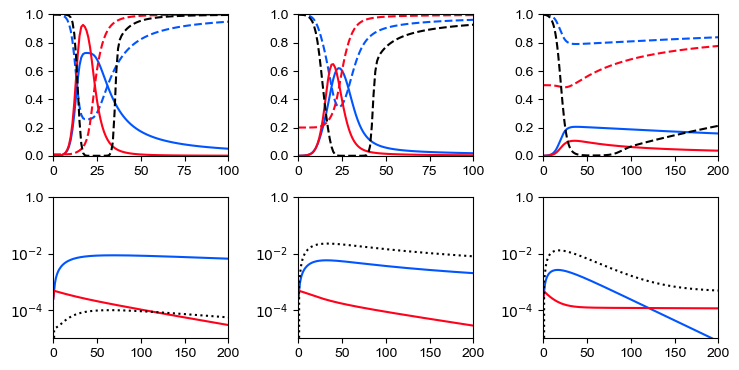

In [29]:
#Figure 2
f1, axes = PyPlot.subplots(2,3,figsize=(7.5,3.8),frameon=false,)

output = output_1
t=100

#drive construct
axes[1].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[1].plot(0:t,output["allelefreq_adult"].B,c=blue,"--",label = "WT")
axes[1].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[1].plot(0:t,output["allelefreq_adult"].α,c=red,"--",label = "resistant")
axes[1].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Biting adult females")
axes[1].set_xlim([0,t])
axes[1].set_ylim([0,1])

output = off_target_output_1
t=200
axes[2].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[2].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[2].plot(0:t,1 .-output["relative_number_females"].adult,c="black",":", label = "Biting adult females")
axes[2].set_xlim([0,t])
axes[2].set_ylim([10^-5,1])
axes[2].set_yscale("log")

output = output_3
t=100
#drive construct
axes[3].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[3].plot(0:t,output["allelefreq_adult"].B,c=blue,"--",label = "WT")
axes[3].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[3].plot(0:t,output["allelefreq_adult"].α,c=red,"--",label = "resistant")
axes[3].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Biting adult females")
axes[3].set_xlim([0,t])
axes[3].set_ylim([0,1])

output = off_target_output_3
t=200
axes[4].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[4].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[4].plot(0:t,1 .-output["relative_number_females"].adult,c="black",":", label = "Biting adult females")
axes[4].set_xlim([0,t])
axes[4].set_ylim([10^-5,1])
axes[4].set_yscale("log")

output = output_5
t=200
#drive construct
axes[5].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[5].plot(0:t,output["allelefreq_adult"].B,c=blue,"--",label = "WT")
axes[5].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[5].plot(0:t,output["allelefreq_adult"].α,c=red,"--",label = "resistant")
axes[5].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Biting adult females")
axes[5].set_xlim([0,t])
axes[5].set_ylim([0,1])

output = off_target_output_5
t=200
axes[6].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[6].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[6].plot(0:t,1 .-output["relative_number_females"].adult,c="black",":", label = "Biting adult females")
axes[6].set_xlim([0,t])
axes[6].set_ylim([10^-5,1])
axes[6].set_yscale("log")

axes[1].set_yticks([0,0.2,0.4,0.6,0.8,1])
axes[3].set_yticks([0,0.2,0.4,0.6,0.8,1])
axes[5].set_yticks([0,0.2,0.4,0.6,0.8,1])

axes[2].set_yticks([10^-4,10^-2,10^-0])
axes[2].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=10)

axes[4].set_yticks([10^-4,10^-2,10^-0])
axes[4].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=10)

axes[6].set_yticks([10^-4,10^-2,10^-0])
axes[6].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=10)

axes[6].set_yticks([10^-4,10^-2,10^-0])
axes[6].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=10)

PyPlot.tight_layout()
PyPlot.show()


### Figure S3

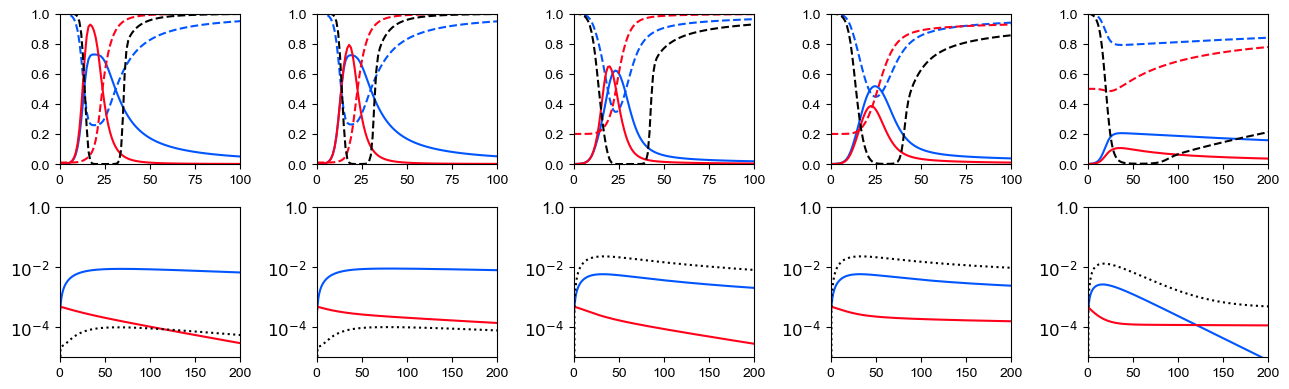

In [28]:
#Figure S3

f1, axes = PyPlot.subplots(2,5,figsize=(13,4),frameon=false,)

output = output_1
t=100
n=1
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].B,c=blue,"--",label = "WT")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,output["allelefreq_adult"].α,c=red,"--",label = "resistant")
axes[n].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([0,1])

output = off_target_output_1
t=200
n=2
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,1 .-output["relative_number_females"].adult,c="black",":", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([10^-5,1])
axes[n].set_yscale("log")

output = output_2
t=100
n=3
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].B,c=blue,"--",label = "WT")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,output["allelefreq_adult"].α,c=red,"--",label = "resistant")
axes[n].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([0,1])

output = off_target_output_2
t=200
n=4
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,1 .-output["relative_number_females"].adult,c="black",":", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([10^-5,1])
axes[n].set_yscale("log")

output = output_3
t=100
n=5
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].B,c=blue,"--",label = "WT")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,output["allelefreq_adult"].α,c=red,"--",label = "resistant")
axes[n].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([0,1])

output = off_target_output_3
t=200
n=6
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,1 .-output["relative_number_females"].adult,c="black",":", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([10^-5,1])
axes[n].set_yscale("log")
#axes[4].set_xlabel("Time (generations)",size=10)

output = output_4
t=100
n=7
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].B,c=blue,"--",label = "WT")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,output["allelefreq_adult"].α,c=red,"--",label = "resistant")
axes[n].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([0,1])

output = off_target_output_4
t=200
n=8
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,1 .-output["relative_number_females"].adult,c="black",":", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([10^-5,1])
axes[n].set_yscale("log")


output = output_5
t=200
n=9
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].B,c=blue,"--",label = "WT")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,output["allelefreq_adult"].α,c=red,"--",label = "resistant")
axes[n].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([0,1])

output = off_target_output_5
t=200
n=10
axes[n].plot(0:t,output["allelefreq_adult"].b,c=blue,"-",label = "construct B")
axes[n].plot(0:t,output["allelefreq_adult"].a,c=red,"-",label = "construct A")
axes[n].plot(0:t,1 .-output["relative_number_females"].adult,c="black",":", label = "Biting adult females")
axes[n].set_xlim([0,t])
axes[n].set_ylim([10^-5,1])
axes[n].set_yscale("log")

axes[1].set_yticks([0,0.2,0.4,0.6,0.8,1])
axes[3].set_yticks([0,0.2,0.4,0.6,0.8,1])
axes[5].set_yticks([0,0.2,0.4,0.6,0.8,1])
axes[7].set_yticks([0,0.2,0.4,0.6,0.8,1])
axes[9].set_yticks([0,0.2,0.4,0.6,0.8,1])

axes[2].set_yticks([10^-4,10^-2,10^-0])
axes[2].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=12)

axes[4].set_yticks([10^-4,10^-2,10^-0])
axes[4].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=12)

axes[6].set_yticks([10^-4,10^-2,10^-0])
axes[6].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=12)

axes[8].set_yticks([10^-4,10^-2,10^-0])
axes[8].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=12)

axes[10].set_yticks([10^-4,10^-2,10^-0])
axes[10].set_yticklabels(["\$10^{-4}\$","\$10^{-2}\$","1.0"],size=12)

PyPlot.tight_layout()
PyPlot.show()
